In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

sns.set_style("whitegrid")

font = {'family': 'sans-serif', 'serif' : 'Helvetica',
        'size'   : 25}
plt.rc('font', **font)

my_quali_colormaps = ['colorblind', 'Dark2']

In [3]:
storage = os.environ['MICOM_EXP'] + 'setA_coculture_simTime12h/' # on Peregrine
print(storage)

run_status_file = storage + "run_status.tsv"
run_status = pd.read_csv(run_status_file, sep="\t", usecols=['rep_name','simID', 'culture_type', 'program_log_doneSim'])

rep_simID_dict = run_status.loc[run_status['program_log_doneSim']==1.0, :].groupby(['rep_name', 'culture_type'])['simID'].apply(list).to_dict()
rep_simID_dict

/data/s4278836/First_project/experiments/setA_coculture_simTime12h/


{('rep1', 'batch'): ['I_a_I_b_plastic',
  'I_a_I_b_sfm',
  'I_a_II_a_plastic',
  'I_a_II_a_sfm',
  'I_a_II_b_plastic',
  'I_a_II_b_sfm',
  'I_a_III_a_plastic',
  'I_a_III_a_sfm',
  'I_a_III_b_plastic',
  'I_a_III_b_sfm',
  'I_a_IV_a_plastic',
  'I_a_IV_a_sfm',
  'I_a_IV_b_plastic',
  'I_a_IV_b_sfm',
  'I_a_V_plastic',
  'I_a_V_sfm',
  'I_b_II_a_plastic',
  'I_b_II_a_sfm',
  'I_b_II_b_plastic',
  'I_b_II_b_sfm',
  'I_b_III_a_plastic',
  'I_b_III_a_sfm',
  'I_b_III_b_plastic',
  'I_b_III_b_sfm',
  'I_b_IV_a_plastic',
  'I_b_IV_a_sfm',
  'I_b_IV_b_plastic',
  'I_b_IV_b_sfm',
  'I_b_V_plastic',
  'I_b_V_sfm',
  'II_a_II_b_plastic',
  'II_a_II_b_sfm',
  'II_a_III_a_plastic',
  'II_a_III_a_sfm',
  'II_a_III_b_plastic',
  'II_a_III_b_sfm',
  'II_a_IV_a_plastic',
  'II_a_IV_a_sfm',
  'II_a_IV_b_plastic',
  'II_a_IV_b_sfm',
  'II_a_V_plastic',
  'II_a_V_sfm',
  'II_b_III_a_plastic',
  'II_b_III_a_sfm',
  'II_b_III_b_plastic',
  'II_b_III_b_sfm',
  'II_b_IV_a_plastic',
  'II_b_IV_a_sfm',
  'II_b

In [4]:
rep_simID_check_dict = {x[0]+'_'+x[1]: {rep_simID_dict[x][i]: 1 for i in range(len(rep_simID_dict[x]))} for x in rep_simID_dict.keys()}
rep_simID_df = pd.DataFrame.from_dict(rep_simID_check_dict, dtype='int')

print(rep_simID_df.head())
print('\n')
print(rep_simID_df.sum())

                  rep1_batch  rep1_continuous
I_a_I_b_plastic            1                1
I_a_I_b_sfm                1                1
I_a_II_a_plastic           1                1
I_a_II_a_sfm               1                1
I_a_II_b_plastic           1                1


rep1_batch         72
rep1_continuous    72
dtype: int64


For each replicate & culture condition, if sum returns 72, it means all 72 simulations (36 two-member communities in plastic or non-plastic mode) have sucessfully completed.

In [5]:
rep_name_list = rep_simID_df.columns.values
print(rep_name_list)

community_set = set([x.rsplit('_', 1)[0] for x in rep_simID_df.index.values])
print(community_set)

culture_type_list = ['batch', 'continuous']

media = ['EU_avg', 'DACH', 'diabetes2', 
         'gluten_free', 'high_fat', 'high_fiber', 
         'high_protein', 'mediterranean', 'unhealthy', 
         'vegan', 'vegetarian']

['rep1_batch' 'rep1_continuous']
{'I_a_I_b', 'I_a_IV_a', 'IV_a_V', 'I_b_IV_a', 'III_a_III_b', 'I_a_III_a', 'III_a_IV_a', 'I_a_V', 'IV_b_V', 'I_b_III_b', 'III_b_IV_b', 'II_a_II_b', 'II_a_III_a', 'I_b_V', 'III_b_V', 'II_b_III_b', 'III_a_V', 'I_a_II_a', 'II_a_V', 'II_b_IV_b', 'I_b_IV_b', 'II_a_III_b', 'II_b_IV_a', 'I_a_IV_b', 'I_b_III_a', 'II_b_III_a', 'I_a_III_b', 'I_b_II_b', 'II_b_V', 'I_a_II_b', 'II_a_IV_b', 'I_b_II_a', 'III_a_IV_b', 'II_a_IV_a', 'III_b_IV_a', 'IV_a_IV_b'}


In [6]:
replicates = ['rep1_batch']

simID = 'III_a_IV_a_plastic'

check_culture_type = set(r.rsplit('_')[1] for r in replicates)

if len(check_culture_type) > 1:
    raise ValueError('Function only works for one type of culture, either batch or continuous')

cols = ['species_name', 'time', 'od', 'r']
for i in range(20):
    cols.append('r_' + str(i))
    cols.append('p_' + str(i))

meta_file = storage + 'selected_species_setA.tsv'
meta = pd.read_csv(meta_file, sep="\t")

merged_data = pd.DataFrame()

for r in replicates:
    rep = r.rsplit('_')[0]

#     for m in media:
    m = 'high_fiber'
    
    data_dir = storage + rep + '/v2.10.0_sim_' + simID + '/experiments/' + list(check_culture_type)[0] + '_coculture/'  + m + '/'
    data_file = data_dir + 'species_trajectory.tsv'

    df = pd.read_csv(data_file, sep="\t", usecols=cols)
    df['media'] = m
    df['replicate'] = rep

    merged_data = pd.concat([merged_data, df])
    
members = meta.loc[meta['Species_name'].isin(df['species_name'].unique()), :]
print(members)

merged_data.reset_index(drop=True)

merged_data

  Ecotype Ecotype_ID Species_ID                      Species_name
4     III      III_a     setA_6  Brevibacillus_brevis_NBRC_100599
6      IV       IV_a    setA_19      Odoribacter_laneus_YIT_12061


species_name      time         od         r  \
0    Brevibacillus_brevis_NBRC_100599  0.000000   0.001000  12.22660   
1        Odoribacter_laneus_YIT_12061  0.000000   0.001000   6.32846   
2    Brevibacillus_brevis_NBRC_100599  0.027104   0.001393  12.22660   
3        Odoribacter_laneus_YIT_12061  0.027104   0.001187   6.32845   
4    Brevibacillus_brevis_NBRC_100599  0.067702   0.002288  12.22660   
..                                ...       ...        ...       ...   
191      Odoribacter_laneus_YIT_12061  2.170390   5.943550  -0.10000   
192  Brevibacillus_brevis_NBRC_100599  2.194620  29.860300  -0.10000   
193      Odoribacter_laneus_YIT_12061  2.194620   5.943550  -0.10000   
194  Brevibacillus_brevis_NBRC_100599  2.199090  29.860300  -0.10000   
195      Odoribacter_laneus_YIT_12061  2.199090   5.943550  -0.10000   

          r_0  r_1  r_2  r_3  r_4  r_5  ...           p_12           p_13  \
0    12.22660 -0.0 -0.0 -0.0 -0.0 -0.0  ...   0.000000e+00   0.000000e+00   
1     6.32846 -0.0 -0.0 -0.0 -0.0 -0.0  ...   0.000000e+00   0.000000e+00   
2    12.22660 -0.0 -0.0 -0.0 -0.0 -0.0  ...  6.598400e-109  6.598400e-109   
3     6.32845 -0.0 -0.0 -0.0 -0.0 -0.0  ...   1.210870e-57   1.210870e-57   
4    12.22660 -0.0 -0.0 -0.0 -0.0 -0.0  ...  1.243980e-108  1.243980e-108   
..        ...  ...  ...  ...  ...  ...  ...            ...            ...   
191   0.00000  0.0  0.0  0.0  0.0  0.0  ...   5.000000e-02   5.000000e-02   
192   0.00000  0.0  0.0  0.0  0.0  0.0  ...   5.000000e-02   5.000000e-02   
193   0.00000  0.0  0.0  0.0  0.0  0.0  ...   5.000000e-02   5.000000e-02   
194   0.00000  0.0  0.0  0.0  0.0  0.0  ...   5.000000e-02   5.000000e-02   
195   0.00000  0.0  0.0  0.0  0.0  0.0  ...   5.000000e-02   5.000000e-02   

              p_14           p_15           p_16           p_17  \
0     0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
1     0.000000e+00   0.000000e+00   0.000000e+00   0.000000e+00   
2    6.598400e-109  6.598400e-109  6.598400e-109  6.598400e-109   
3     1.210870e-57   1.210870e-57   1.210870e-57   1.210870e-57   
4    1.243980e-108  1.243980e-108  1.243980e-108  1.243980e-108   
..             ...            ...            ...            ...   
191   5.000000e-02   5.000000e-02   5.000000e-02   5.000000e-02   
192   5.000000e-02   5.000000e-02   5.000000e-02   5.000000e-02   
193   5.000000e-02   5.000000e-02   5.000000e-02   5.000000e-02   
194   5.000000e-02   5.000000e-02   5.000000e-02   5.000000e-02   
195   5.000000e-02   5.000000e-02   5.000000e-02   5.000000e-02   

              p_18           p_19       media  replicate  
0     0.000000e+00   0.000000e+00  high_fiber       rep1  
1     0.000000e+00   0.000000e+00  high_fiber       rep1  
2    6.598400e-109  6.598400e-109  high_fiber       rep1  
3     1.210870e-57   1.210870e-57  high_fiber       rep1  
4    1.243980e-108  1.243980e-108  high_fiber       rep1  
..             ...            ...         ...        ...  
191   5.000000e-02   5.000000e-02  high_fiber       rep1  
192   5.000000e-02   5.000000e-02  high_fiber       rep1  
193   5.000000e-02   5.000000e-02  high_fiber       rep1  
194   5.000000e-02   5.000000e-02  high_fiber       rep1  
195   5.000000e-02   5.000000e-02  high_fiber       rep1  

[196 rows x 46 columns]

In [7]:
from matplotlib.collections import LineCollection

def gradient_line(data, x, y, gradient, ymin, ymax, ax, cmap='hot_r', lw=2): # Sourced from matplotlib documentation
    x_ = np.array(data[x])
    y_ = np.array(data[y])
    grad = np.array(data[gradient])[1:]
    
    # Create a set of line segments so that we can color them individually
    # This creates the points as a N x 1 x 2 array so that we can stack points
    # together easily to get the segments. The segments array for line collection
    # needs to be (numlines) x (points per line) x 2 (for x and y)
    points = np.array([x_, y_]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    
    # Create a continuous norm to map from data points to colors
    norm = plt.Normalize(0.0, 1.0)
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    
    # Set the values used for colormapping
    lc.set_array(grad)
    lc.set_linewidth(lw)
    line = ax.add_collection(lc)
    
    ax.set_xlim(x_.min(), x_.max())
    ax.set_ylim(ymin, ymax)
    
    return line

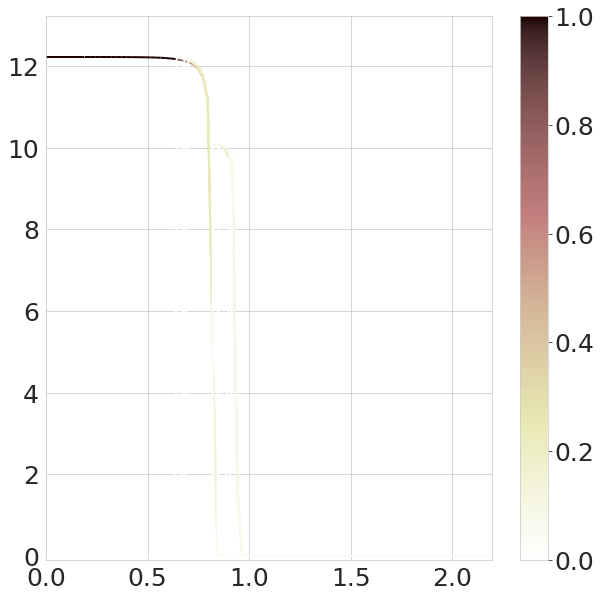

In [8]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_data = merged_data.loc[merged_data['species_name'] == 'Brevibacillus_brevis_NBRC_100599', :]

for i in range(20):
    grad_line = gradient_line(data=plot_data, x='time', y='r_' + str(i), gradient='p_' + str(i), 
                              ymin=-0.1, ymax=plot_data['r'].max()+1.0, 
                              cmap='pink_r', ax=ax)
    
    if i==19:
        fig.colorbar(grad_line, ax=ax)

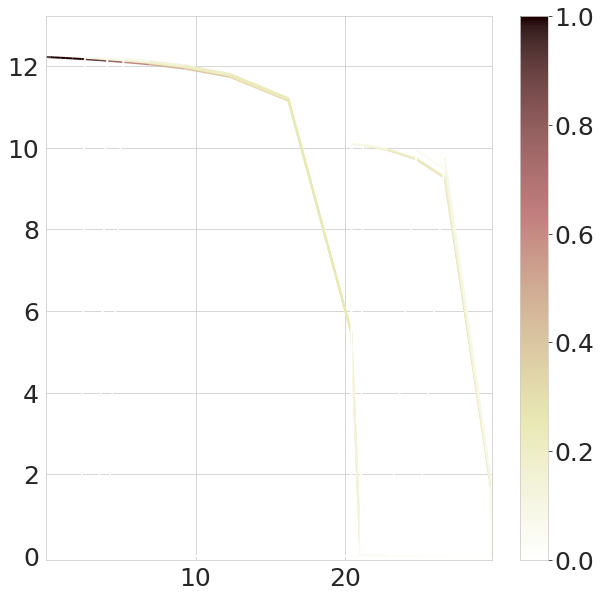

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))

plot_data = merged_data.loc[merged_data['species_name'] == 'Brevibacillus_brevis_NBRC_100599', :]

for i in range(20):
    grad_line = gradient_line(data=plot_data, x='od', y='r_' + str(i), gradient='p_' + str(i), 
                              ymin=-0.1, ymax=plot_data['r'].max()+1.0, 
                              cmap='pink_r', ax=ax)
    
    if i==19:
        fig.colorbar(grad_line, ax=ax)